In [91]:
import csv
import random

file_input = 'Hasil/keypoints_train.csv'

interval = 15
count = 0

with open(file_input, mode='r', newline='') as file:
    reader = csv.reader(file)
    
    datas = []
    next(reader)

    for row in reader:

        if count >= interval:
            datas.append(row)
            count = 0
        else:
            count += 1

random.shuffle(datas)

for data in datas:
    print(data)

['-1.092712879', '-0.333298355', '-1.217178583', '-0.190925524', '-1.223466039', '-0.411836386', '-1.298829436', '0.115752332 ', '-1.322073579', '-0.441934109', '-0.960933387', '0.463228345 ', '-1.038184047', '-0.522640765', '-0.200547397', '0.652768016 ', '-0.653642476', '-0.640127897', '0.340211928 ', '0.298696995 ', '0.087550014 ', '-0.760261774', '0.008598077 ', '0.286301315 ', '-0.008598077', '-0.286301821', '1.045147896 ', '0.169028446 ', '0.806097269 ', '-0.778541207', '1.071523190 ', '0.283677876 ', '0.650224209 ', '-0.754863739', 'Duduk       ']
['-1.229781270', '-0.207892075', '-1.304373860', '-0.092775367', '-1.335404158', '-0.255598754', '-1.344461918', '0.140504166 ', '-1.357852936', '-0.205494419', '-0.937593341', '0.376428902 ', '-1.058367252', '-0.249373883', '-0.246885836', '0.518229008 ', '-0.476151168', '-0.383143157', '0.200477004 ', '0.181466341 ', '0.149764583 ', '-0.486805111', '0.016942274 ', '0.219761670 ', '-0.016942274', '-0.219761670', '0.696610332 ', '-0.01

In [3]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [50]:
%pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.


In [131]:
import csv
import numpy as np
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import SGD
import random


data_train = []
data_val = []

interval = 5

file_keypoints = "Hasil/keypoints_train.csv"

with open(file_keypoints, mode='r', encoding='utf-8-sig') as file:
    reader = csv.reader(file)
    header = next(reader)  # skip header

    for row in reader:
        data_train.append(row)

random.shuffle(data_train)

data_train = [row for i, row in enumerate(data_train) if i % interval == 0]

X_train = [row[:-1] for row in data_train]
X_train = np.array([[float(x) for x in y] for y in X_train])
y_train_arr = np.array([row[-1] for row in data_train])

encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train_arr)

file_keypoints_val = "Hasil/keypoints_val.csv"

with open(file_keypoints_val, mode='r', encoding='utf-8-sig') as file1:
    reader = csv.reader(file1)
    header = next(reader)  # skip header

    for row in reader:
        data_val.append(row)

random.shuffle(data_val)

data_val = [row for i, row in enumerate(data_val) if i % interval == 0]

X_val = [row[:-1] for row in data_val]
X_val = np.array([[float(x) for x in y] for y in X_val])
y_val_arr = np.array([row[-1] for row in data_val])

y_val = encoder.fit_transform(y_val_arr)

Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.2622 - loss: 1.2023 - val_accuracy: 0.3853 - val_loss: 1.0589
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2823 - loss: 1.1780 - val_accuracy: 0.3853 - val_loss: 1.0426
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3023 - loss: 1.1592 - val_accuracy: 0.4029 - val_loss: 1.0269
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3332 - loss: 1.1322 - val_accuracy: 0.6000 - val_loss: 1.0118
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3449 - loss: 1.1243 - val_accuracy: 0.7118 - val_loss: 0.9972
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3584 - loss: 1.1055 - val_accuracy: 0.7118 - val_loss: 0.9833
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4124 - loss: 1.0859 - val_accuracy: 0.7294 - val_loss: 0.9697
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4204 - loss: 1.0672 - val_accuracy: 0.7529 - val_loss: 0.9564

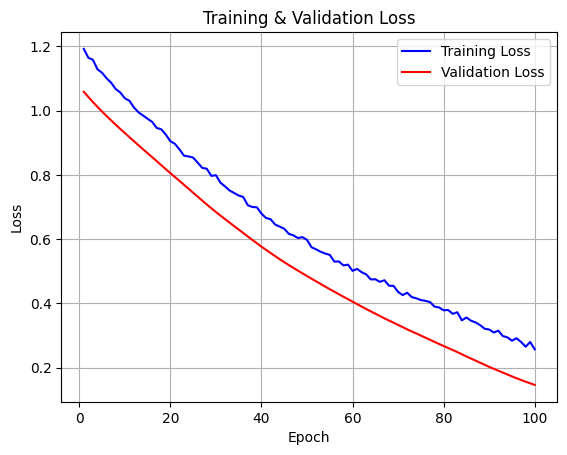

In [166]:
early_stop = EarlyStopping(
    monitor='val_loss',  # bisa juga 'val_accuracy'
    patience=5,           # stop jika tidak membaik dalam 5 epoch
    restore_best_weights=True
)

model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(len(np.unique(y_train)), activation='sigmoid'),
])

model.compile(optimizer=Adam(learning_rate=0.00003), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=100, batch_size=128, validation_data=(X_val, y_val), callbacks=[early_stop])

import matplotlib.pyplot as plt

# Ambil data loss dan val_loss dari history
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'b-', label='Training Loss')
plt.plot(epochs, val_loss, 'r-', label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training & Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

In [169]:
model.save('deteksi_gerakan.h5')

In [170]:
# Memuat kembali
from tensorflow.keras.models import load_model
model = load_model('deteksi_gerakan.h5')

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


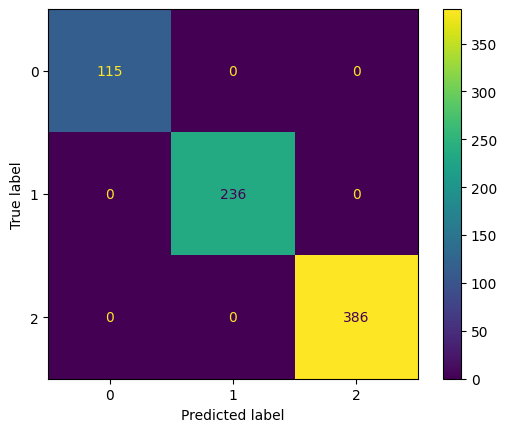

In [172]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

data_test = []

file_keypoints_test = "test.csv"
# file_keypoints_test = "Hasil/keypoints_test.csv"

with open(file_keypoints_test, mode='r', encoding='utf-8-sig') as file1:
    reader = csv.reader(file1)
    header = next(reader)  # skip header

    for row in reader:
        data_test.append(row)

# random.shuffle(data_test)

X_test = [row[:-1] for row in data_test]
X_test = np.array([[float(x) for x in y] for y in X_test])
y_test_arr = np.array([row[-1] for row in data_test])
y_test = encoder.fit_transform(y_test_arr)

y_pred = model.predict(X_test).argmax(axis=1)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)


In [119]:
import numpy as np

print(len(X_test))
count_berdiri_benar = 0
count_berdiri_salah = 0
count_duduk_benar = 0
count_duduk_salah = 0
count_sujud_benar = 0
count_sujud_salah = 0

for i in range(len(X_test)):

    # Ambil satu sample dari test set
    sample = X_test[i].reshape(1, -1)

    # Prediksi
    pred = model.predict(sample)
    label_index = np.argmax(pred)
    predicted_label = encoder.inverse_transform([label_index])

    if predicted_label[0] == "Berdiri     " and encoder.inverse_transform([y_test[i]]) == ["Berdiri     "]:
        count_berdiri_benar += 1
    elif predicted_label[0] != "Berdiri     " and encoder.inverse_transform([y_test[i]]) == ["Berdiri     "]:
        count_berdiri_salah += 1
    elif predicted_label[0] == "Duduk       " and encoder.inverse_transform([y_test[i]]) == ["Duduk       "]:
        count_duduk_benar += 1
    elif predicted_label[0] != "Duduk       " and encoder.inverse_transform([y_test[i]]) == ["Duduk       "]:
        count_duduk_salah += 1
    elif predicted_label[0] == "Sujud       " and encoder.inverse_transform([y_test[i]]) == ["Sujud       "]:
        count_sujud_benar += 1
    elif predicted_label[0] != "Sujud       " and encoder.inverse_transform([y_test[i]]) == ["Sujud       "]:
        count_sujud_salah += 1

    print("Label asli:", encoder.inverse_transform([y_test[i]]))
    print("Prediksi model:", predicted_label[0])


print("TP berdiri", count_berdiri_benar)
print("FN berdiri", count_berdiri_salah)
print("TP duduk", count_duduk_benar)
print("FN duduk", count_duduk_salah)
print("TP sujud", count_sujud_benar)
print("FN sujud", count_sujud_salah)


737
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Label asli: ['Berdiri     ']
Prediksi model: Berdiri     
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Label asli: ['Berdiri     ']
Prediksi model: Berdiri     
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Label asli: ['Berdiri     ']
Prediksi model: Berdiri     
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Label asli: ['Berdiri     ']
Prediksi model: Berdiri     
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Label asli: ['Berdiri     ']
Prediksi model: Berdiri     
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Label asli: ['Berdiri     ']
Prediksi model: Berdiri     
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Label asli: ['Berdiri     ']
Prediksi model: Berdiri     
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Label asli: ['Berdiri     ']
Prediksi model: Berdiri     
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Label asli: ['Berdiri     ']
Prediksi model: Berdiri     
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Label asli: ['Berdiri     ']
Prediksi model: Berdiri     
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/ste

In [77]:
import csv

file_input = "test.csv"

data = []
frame = 668
count = 0

with open(file_input, mode='r') as file:
    reader = csv.reader(file)

    for row in reader:
        if count == frame:
            data.append(row)
            break
        else:
            count += 1

X_test = np.array([[float(x) for x in y] for y in data]).reshape(1, -1)

pred = model.predict(X_test)
label_index = np.argmax(pred)
predicted_label = encoder.inverse_transform([label_index])

print(predicted_label)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
['Sujud       ']


In [48]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_classes, target_names=encoder.classes_))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


ValueError: Found input variables with inconsistent numbers of samples: [1328, 1]

In [16]:
from sklearn.metrics import classification_report
print(classification_report(y_val, y_pred))


ValueError: Classification metrics can't handle a mix of multiclass and continuous-multioutput targets